# Estudos do capítulo 7


Voting Classifier


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise = 0.15)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting="hard"
)

voting_clf.fit(X, y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise = 0.20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.85
RandomForestClassifier 0.97
SVC 0.98
VotingClassifier 0.98


Bagging


In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1 # use all avaiable cores
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [33]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, model, title="Decision Boundaries"):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x1_min, x1_max, 500),
        np.linspace(x2_min, x2_max, 500)
    )
    X_new = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(X_new).reshape(xx.shape)

    custom_cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_pred, cmap=custom_cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, edgecolor='k', s=40)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.title(title)
    plt.grid(True)
    plt.show()


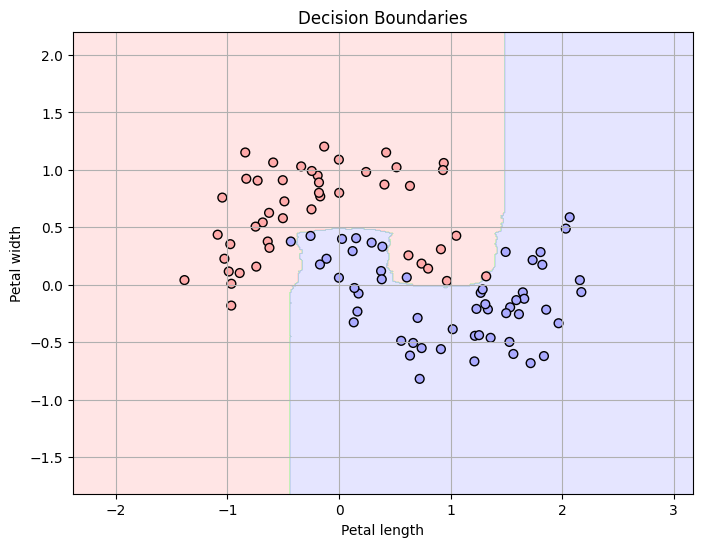

In [35]:
plot_decision_boundaries(X_test, y_test, bag_clf)

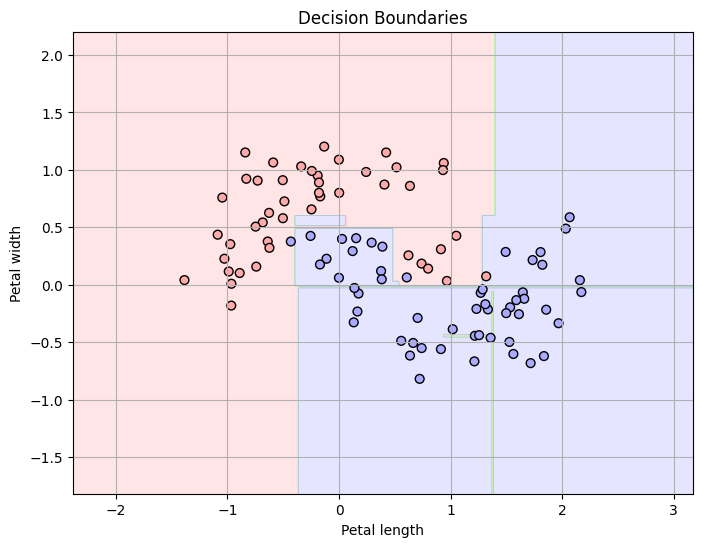

In [36]:
plot_decision_boundaries(X_test, y_test, tree_clf)

In [38]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1, # use all avaiable cores
    oob_score=True # use oob instances to validate model performance
)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.965

In [40]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.97

In [41]:
bag_clf.oob_decision_function_

array([[1.        , 0.        ],
       [0.85526316, 0.14473684],
       [0.00793651, 0.99206349],
       [0.04336735, 0.95663265],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.85564304, 0.14435696],
       [0.71989529, 0.28010471],
       [0.        , 1.        ],
       [0.9973822 , 0.0026178 ],
       [0.0052356 , 0.9947644 ],
       [0.99491094, 0.00508906],
       [0.00251256, 0.99748744],
       [0.05339806, 0.94660194],
       [0.99750623, 0.00249377],
       [0.22959184, 0.77040816],
       [0.81954887, 0.18045113],
       [0.02933985, 0.97066015],
       [0.89646465, 0.10353535],
       [0.29219144, 0.70780856],
       [1.        , 0.        ],
       [0.02512563, 0.97487437],
       [0.14025974, 0.85974026],
       [0.9974026 , 0.0025974 ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.21108179, 0.78891821],
       [1.        , 0.        ],
       [0.06753247, 0.93246753],
       [1.

Random Forests


In [43]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1   # use all avaible CPU cores
)

rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [45]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09174940673259457
sepal width (cm) 0.023885460318322012
petal length (cm) 0.4485890891960468
petal width (cm) 0.43577604375303663


Gradient Boosting


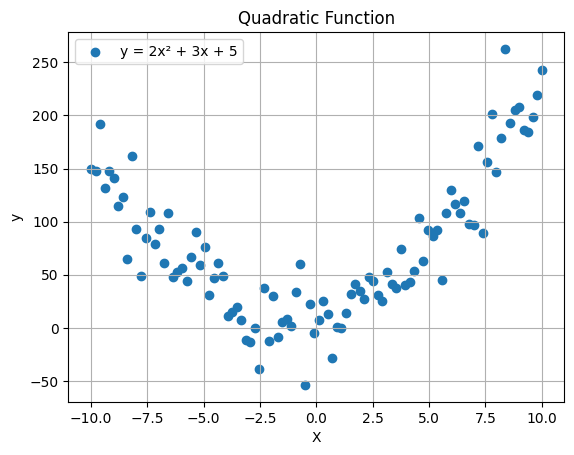

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients of the quadratic function
a = 2
b = 3
c = 5

# Generate x values
X = np.linspace(-10, 10, 100)
X_reshaped = X.reshape(-1, 1)  # Reshape for sklearn

# Add noise
noise = np.random.normal(0, 25, 100)

# Compute y values
y = (a * X**2 + b * X + c) + noise

# Optionally visualize the function
plt.scatter(X, y, label='y = 2x² + 3x + 5')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Quadratic Function')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X_reshaped, y)
pred1 = tree_reg1.predict(X_reshaped)

# now, we train a second regressor on the residual errors made by the first one
y2 = y - pred1

tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X_reshaped, y2)
pred2 = tree_reg2.predict(X_reshaped)

# finally, we train a final regresor on the residual errors made by the second regressor
y3 = y2 - pred2

tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X_reshaped, y3)
pred3 = tree_reg3.predict(X_reshaped)

# make the final prediction
final_pred = sum(tree.predict(X_reshaped) for tree in (tree_reg1, tree_reg2, tree_reg3))

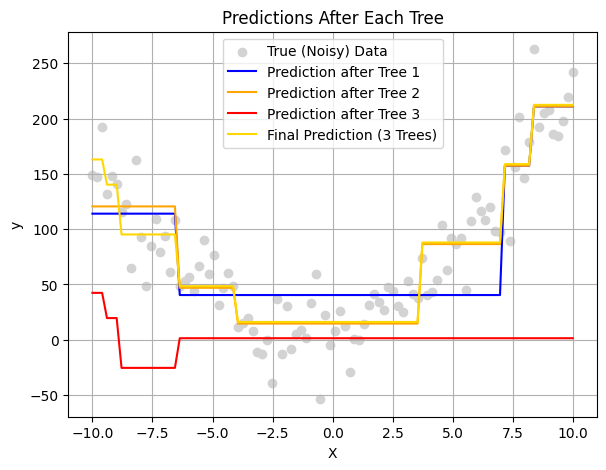

In [6]:
# plot predictions
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color="lightgray", label="True (Noisy) Data")
plt.plot(X, pred1, label="Prediction after Tree 1", color='blue')
plt.plot(X, pred1 + pred2, label="Prediction after Tree 2", color='orange')
plt.plot(X, pred3, label="Prediction after Tree 3", color='red')
plt.plot(X, final_pred, label="Final Prediction (3 Trees)", color='gold')
plt.title("Predictions After Each Tree")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)

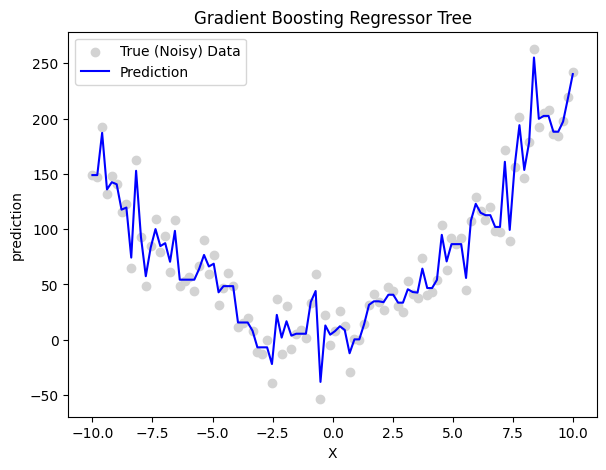

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=300, learning_rate=0.1)
gbrt.fit(X_reshaped, y)

prediction = gbrt.predict(X_reshaped)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color="lightgray", label="True (Noisy) Data")
plt.plot(X, prediction, label="Prediction", color="blue")
plt.xlabel("X")
plt.ylabel("prediction")
plt.title("Gradient Boosting Regressor Tree")
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]
best_n_estimators = np.argmin(errors) + 1 # returns the index of min value

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt_best.fit(X_train, y_train)

final_best_pred = gbrt_best.predict(X_test)

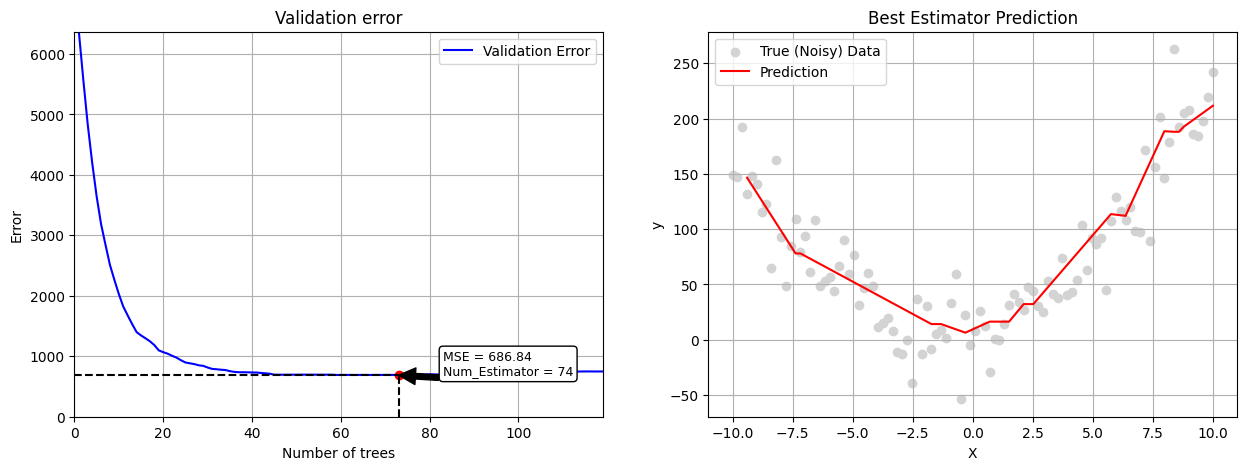

In [9]:
# plot everything
plt.figure(figsize=(15, 5))

# ===== subplot 1 =====
plt.subplot(1,2,1)
plt.plot([i+1 for i in range(len(errors))], errors, color="blue", label="Validation Error")
plt.xlabel("Number of trees")
plt.ylabel("Error")
plt.title("Validation error")
plt.vlines(best_n_estimators-1, ymax=errors[best_n_estimators-1], ymin=0, linestyles='--', color="black")
plt.hlines(errors[best_n_estimators-1], xmax=best_n_estimators-1, xmin=0, linestyles='--', color="black")
plt.scatter(best_n_estimators-1, errors[best_n_estimators-1], color="red")
plt.annotate(
    f"MSE = {errors[best_n_estimators-1]:.2f}\nNum_Estimator = {best_n_estimators}",
    xy=(best_n_estimators-1, errors[best_n_estimators-1]),
    xytext=(best_n_estimators-1 + 10, errors[best_n_estimators-1] + 5),  # adjust as needed
    arrowprops=dict(facecolor='black', shrink=0.005),
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'),
    fontsize=9
)

plt.grid(True)
plt.xlim(0, len(errors) - 1)
plt.ylim(0, max(errors))
plt.legend()

# ===== subplot 2 =====
plt.subplot(1, 2, 2)

# Sort X_test to ensure smooth plotting
sorted_idx = np.argsort(X_test[:, 0])  # Sort X_test based on the first column
X_test_sorted = X_test[sorted_idx]
final_best_pred_sorted = final_best_pred[sorted_idx]

# Scatter plot for noisy data and line plot for predictions
plt.scatter(X, y, color="lightgray", label="True (Noisy) Data")
plt.plot(X_test_sorted, final_best_pred_sorted, color="red", label="Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Best Estimator Prediction")
plt.grid(True)
plt.legend()

plt.show()

XGBoost


In [ ]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)
y_pred = xgb_reg.predict(X_test)

[0]	validation_0-rmse:67.11872
[1]	validation_0-rmse:53.66913
[2]	validation_0-rmse:44.98907
[3]	validation_0-rmse:39.27253


[4]	validation_0-rmse:35.71792
[5]	validation_0-rmse:33.65852
[6]	validation_0-rmse:32.38684
[7]	validation_0-rmse:31.89544
[8]	validation_0-rmse:31.84291
[9]	validation_0-rmse:31.62958
[10]	validation_0-rmse:31.75680
[11]	validation_0-rmse:32.38545
[12]	validation_0-rmse:32.71963
[13]	validation_0-rmse:33.55352
[14]	validation_0-rmse:33.62911
[15]	validation_0-rmse:34.02992
[16]	validation_0-rmse:34.07765
[17]	validation_0-rmse:34.60418
[18]	validation_0-rmse:34.84233
[19]	validation_0-rmse:35.03453
[20]	validation_0-rmse:35.23631
[21]	validation_0-rmse:35.50277
[22]	validation_0-rmse:35.53579
[23]	validation_0-rmse:35.63124
[24]	validation_0-rmse:35.85747
[25]	validation_0-rmse:36.02930
[26]	validation_0-rmse:36.08809
[27]	validation_0-rmse:36.14323
[28]	validation_0-rmse:36.34639
[29]	validation_0-rmse:36.49842
[30]	validation_0-rmse:36.55183
[31]	validation_0-rmse:36.60485
[32]	validation_0-rmse:36.69348
[33]	validation_0-rmse:36.74588
[34]	validation_0-rmse:36.85893
[35]	validatio

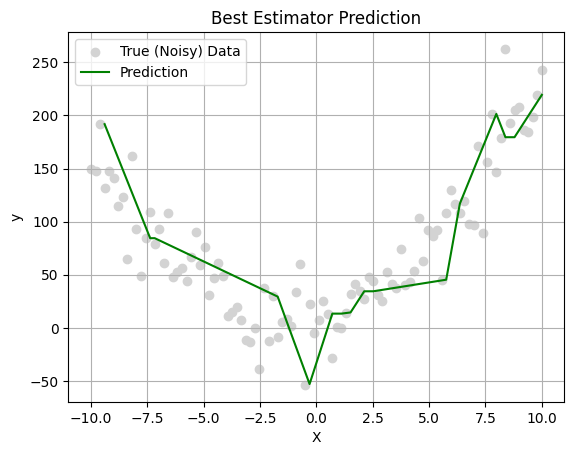

In [31]:
# Scatter plot for noisy data and line plot for predictions
# Sort X_test to ensure smooth plotting
sorted_idx = np.argsort(X_test[:, 0])  # Sort X_test based on the first column
X_test_sorted = X_test[sorted_idx]
y_pred = y_pred[sorted_idx]

plt.scatter(X, y, color="lightgray", label="True (Noisy) Data")
plt.plot(X_test_sorted, y_pred, color="green", label="Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Best Estimator Prediction")
plt.grid(True)
plt.legend()

plt.show()